In [3]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [4]:
!nvidia-smi

Fri Aug 23 09:17:34 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [7]:

!unzip archive\ \(5\).zip

Streaming output truncated to the last 5000 lines.
  inflating: tomato/train/Tomato___Target_Spot/0118c27a-f34a-41e1-8b2f-d2c564f83c5c___Com.G_TgS_FL 0013.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0118ed61-b135-45be-ad81-7e2d54203be4___Com.G_TgS_FL 8241.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0197df47-a9cb-4b6c-b72c-ac0e9af6d135___Com.G_TgS_FL 0779.JPG  
  inflating: tomato/train/Tomato___Target_Spot/025510ac-15db-4861-b02b-21da82161100___Com.G_TgS_FL 0952.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0288164e-d6cf-4215-b593-7b581308a4cf___Com.G_TgS_FL 9777.JPG  
  inflating: tomato/train/Tomato___Target_Spot/03002b91-afe3-4c72-86b8-31028913434e___Com.G_TgS_FL 0682.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0352b802-bcae-4ced-b483-e9a14292fa3b___Com.G_TgS_FL 7872.JPG  
  inflating: tomato/train/Tomato___Target_Spot/047144a4-3164-41d5-a4cd-6fba8b4bfdd5___Com.G_TgS_FL 0024.JPG  
  inflating: tomato/train/Tomato___Target_Spot/04877a47-d7e8-461d-b94

In [17]:
!unzip archive\ \(4\).zip

Archive:  archive (4).zip
  inflating: data/Blight/Corn_Blight (1).jpeg  
  inflating: data/Blight/Corn_Blight (1).jpg  
  inflating: data/Blight/Corn_Blight (10).jpg  
  inflating: data/Blight/Corn_Blight (100).jpg  
  inflating: data/Blight/Corn_Blight (1000).JPG  
  inflating: data/Blight/Corn_Blight (1001).JPG  
  inflating: data/Blight/Corn_Blight (1002).JPG  
  inflating: data/Blight/Corn_Blight (1003).JPG  
  inflating: data/Blight/Corn_Blight (1004).JPG  
  inflating: data/Blight/Corn_Blight (1005).JPG  
  inflating: data/Blight/Corn_Blight (1006).JPG  
  inflating: data/Blight/Corn_Blight (1007).JPG  
  inflating: data/Blight/Corn_Blight (1008).JPG  
  inflating: data/Blight/Corn_Blight (1009).JPG  
  inflating: data/Blight/Corn_Blight (101).jpg  
  inflating: data/Blight/Corn_Blight (1010).JPG  
  inflating: data/Blight/Corn_Blight (1011).jpg  
  inflating: data/Blight/Corn_Blight (1012).JPG  
  inflating: data/Blight/Corn_Blight (1013).JPG  
  inflating: data/Blight/Corn_Bli

In [18]:
data_path='/content/data'
images = []
import pandas as pd
import os
labels = []

for subfolder in os.listdir(data_path):

    subfolder_path = os.path.join(data_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue

    for image_filename in os.listdir(subfolder_path):
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)

        labels.append(subfolder)

data = pd.DataFrame({'image': images, 'label': labels})

In [19]:
data_path='/content/tomato/train'
images = []
labels = []

for subfolder in os.listdir(data_path):

    subfolder_path = os.path.join(data_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue

    for image_filename in os.listdir(subfolder_path):
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)

        labels.append(subfolder)

data1 = pd.DataFrame({'image': images, 'label': labels})

In [20]:
data.head()


,image,label
0,/content/data/Gray_Leaf_Spot/Corn_Gray_Spot (3...,Gray_Leaf_Spot
1,/content/data/Gray_Leaf_Spot/Corn_Gray_Spot (9...,Gray_Leaf_Spot
2,/content/data/Gray_Leaf_Spot/Corn_Gray_Spot (1...,Gray_Leaf_Spot
3,/content/data/Gray_Leaf_Spot/Corn_Gray_Spot (5...,Gray_Leaf_Spot
4,/content/data/Gray_Leaf_Spot/Corn_Gray_Spot (5...,Gray_Leaf_Spot


In [21]:
data.describe()

,image,label
count,4188,4188
unique,4188,4
top,/content/data/Common_Rust/Corn_Common_Rust (11...,Common_Rust
freq,1,1306


In [22]:
data1.head()

,image,label
0,/content/tomato/train/Tomato___healthy/20249fb...,Tomato___healthy
1,/content/tomato/train/Tomato___healthy/ee83a3b...,Tomato___healthy
2,/content/tomato/train/Tomato___healthy/d578b8c...,Tomato___healthy
3,/content/tomato/train/Tomato___healthy/fb0f6e2...,Tomato___healthy
4,/content/tomato/train/Tomato___healthy/ad270b5...,Tomato___healthy


In [23]:
data1.describe()

,image,label
count,10000,10000
unique,10000,10
top,/content/tomato/train/Tomato___Bacterial_spot/...,Tomato___healthy
freq,1,1000


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4188 entries, 0 to 4187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   4188 non-null   object
 1   label   4188 non-null   object
dtypes: object(2)
memory usage: 65.6+ KB


In [25]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   10000 non-null  object
 1   label   10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [26]:
from sklearn.model_selection import train_test_split

X = data['image']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [27]:
import pandas as pd
X_train = pd.concat([X_train, data1['image']], ignore_index=True)
y_train = pd.concat([y_train, data1['label']], ignore_index=True)


In [28]:
X_train.head()

,image
0,/content/data/Healthy/Corn_Health (720).jpg
1,/content/data/Common_Rust/Corn_Common_Rust (31...
2,/content/data/Common_Rust/Corn_Common_Rust (90...
3,/content/data/Healthy/Corn_Health (943).jpg
4,/content/data/Healthy/Corn_Health (164).jpg


In [29]:
y_train.head()

,label
0,Healthy
1,Common_Rust
2,Common_Rust
3,Healthy
4,Healthy


In [30]:
import random

# Combine X_train and y_train into a list of pairs
train_data = list(zip(X_train, y_train))

# Shuffle the list of pairs
random.shuffle(train_data)

# Unpack the shuffled pairs back into X_train and y_train
X_train, y_train = zip(*train_data)

# Convert X_train and y_train back to pandas Series
X_train = pd.Series(X_train)
y_train = pd.Series(y_train)


In [31]:
X_train.head()

,0
0,/content/data/Gray_Leaf_Spot/Corn_Gray_Spot (3...
1,/content/tomato/train/Tomato___Target_Spot/eaf...
2,/content/tomato/train/Tomato___Leaf_Mold/Tomat...
3,/content/tomato/train/Tomato___Early_blight/To...
4,/content/tomato/train/Tomato___Late_blight/de2...


In [32]:
data_path='/content/tomato/val'
images = []
labels = []

for subfolder in os.listdir(data_path):

    subfolder_path = os.path.join(data_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue

    for image_filename in os.listdir(subfolder_path):
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)

        labels.append(subfolder)

data2 = pd.DataFrame({'image': images, 'label': labels})

In [33]:
data2.head()

,image,label
0,/content/tomato/val/Tomato___healthy/1d1017be-...,Tomato___healthy
1,/content/tomato/val/Tomato___healthy/Tomato___...,Tomato___healthy
2,/content/tomato/val/Tomato___healthy/1ae5cf7c-...,Tomato___healthy
3,/content/tomato/val/Tomato___healthy/Tomato___...,Tomato___healthy
4,/content/tomato/val/Tomato___healthy/Tomato___...,Tomato___healthy


In [34]:
import pandas as pd
X_test = pd.concat([X_test, data2['image']], ignore_index=True)
y_test = pd.concat([y_test, data2['label']], ignore_index=True)


In [35]:
import random

# Combine X_train and y_train into a list of pairs
test_data = list(zip(X_test, y_test))

# Shuffle the list of pairs
random.shuffle(test_data)

# Unpack the shuffled pairs back into X_train and y_train
X_test, y_test = zip(*test_data)

# Convert X_train and y_train back to pandas Series
X_test = pd.Series(X_test)
y_test = pd.Series(y_test)

In [36]:
X_test.head()

,0
0,/content/tomato/val/Tomato___healthy/Tomato___...
1,/content/data/Gray_Leaf_Spot/Corn_Gray_Spot (4...
2,/content/tomato/val/Tomato___Tomato_mosaic_vir...
3,/content/data/Blight/Corn_Blight (604).JPG
4,/content/data/Gray_Leaf_Spot/Corn_Gray_Spot (4...


In [37]:
X_test.head()

,0
0,/content/tomato/val/Tomato___healthy/Tomato___...
1,/content/data/Gray_Leaf_Spot/Corn_Gray_Spot (4...
2,/content/tomato/val/Tomato___Tomato_mosaic_vir...
3,/content/data/Blight/Corn_Blight (604).JPG
4,/content/data/Gray_Leaf_Spot/Corn_Gray_Spot (4...


Found 13350 validated image filenames belonging to 14 classes.
Found 1838 validated image filenames belonging to 14 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 253, 253, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 124, 124, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 246016)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 128)                 │      31,490,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 14)                  │           1,806 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,021,902 (125.97 MB)

 Trainable params: 33,021,902 (125.97 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


418/418 ━━━━━━━━━━━━━━━━━━━━ 212s 475ms/step - accuracy: 0.1996 - loss: 2.2515 - val_accuracy: 0.5272 - val_loss: 1.2872
Epoch 2/5
418/418 ━━━━━━━━━━━━━━━━━━━━ 256s 463ms/step - accuracy: 0.5445 - loss: 1.2976 - val_accuracy: 0.6143 - val_loss: 1.1598
Epoch 3/5
418/418 ━━━━━━━━━━━━━━━━━━━━ 204s 472ms/step - accuracy: 0.6710 - loss: 0.9131 - val_accuracy: 0.6899 - val_loss: 0.8747
Epoch 4/5
418/418 ━━━━━━━━━━━━━━━━━━━━ 198s 462ms/step - accuracy: 0.7108 - loss: 0.8383 - val_accuracy: 0.5261 - val_loss: 1.5674
Epoch 5/5
418/418 ━━━━━━━━━━━━━━━━━━━━ 200s 471ms/step - accuracy: 0.7737 - loss: 0.6767 - val_accuracy: 0.7062 - val_loss: 0.8595


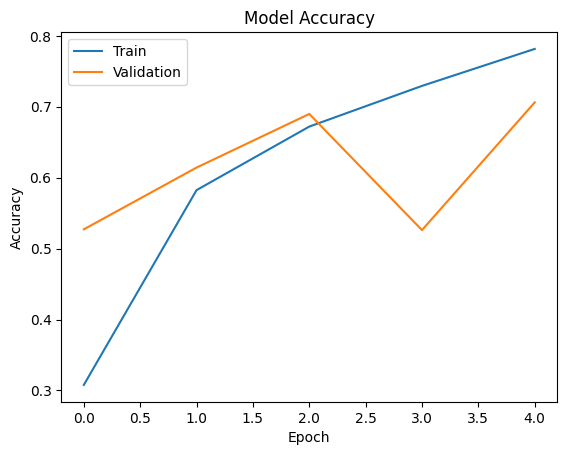

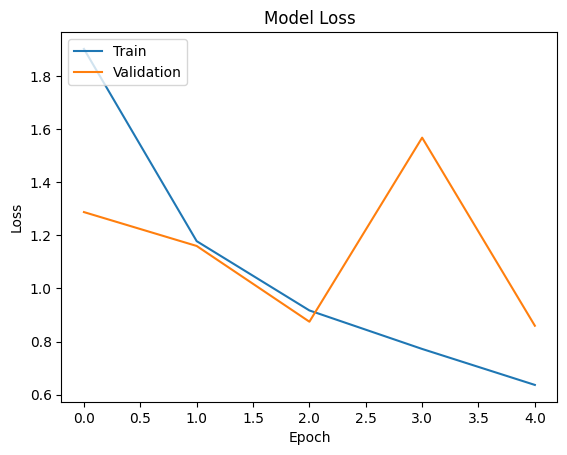

In [42]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Normalization,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


img_width, img_height = 255, 255


train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'image': X_train, 'label': y_train}),
    x_col='image',
    y_col='label',
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'image': X_test, 'label': y_test}),
    x_col='image',
    y_col='label',
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(14, activation='softmax'))


# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
)


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
img_width, img_height = 150, 150

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'image': X_train, 'label': y_train}),
    x_col='image',
    y_col='label',
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'image': X_test, 'label': y_test}),
    x_col='image',
    y_col='label',
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(14, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

# Calculate steps_per_epoch
steps_per_epoch = len(X_train) // train_generator.batch_size

# Calculate validation_steps
validation_steps = len(X_test) // validation_generator.batch_size

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_steps
)


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Found 13350 validated image filenames belonging to 14 classes.
Found 1838 validated image filenames belonging to 14 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │      10,616,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 14)                  │           1,806 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,769,870 (41.08 MB)

 Trainable params: 10,769,870 (41.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


291/417 ━━━━━━━━━━━━━━━━━━━━ 3:20 2s/step - accuracy: 0.3396 - loss: 1.9225

KeyboardInterrupt: 